Análise exploratória:
- histograma da coluna target
-

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Dataset

<hr>

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição do conjunto de dados:

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste exercício será criar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>Regressão Linear</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados

In [ ]:
dados = pd.read_csv('consumo.csv', sep=';')

## Visualizar os dados

In [ ]:
dados.head()

## Verificando o tamanho do dataset

In [ ]:
dados.shape

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [ ]:
dados.corr().round(3)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000,0.863,0.923,0.024,-0.051,0.575
temp_min,0.863,1.000,0.673,0.099,-0.060,0.393
temp_max,0.923,0.673,1.000,-0.049,-0.040,0.643
chuva,0.024,0.099,-0.049,1.000,0.002,-0.194
fds,-0.051,-0.060,-0.040,0.002,1.000,0.506
consumo,0.575,0.393,0.643,-0.194,0.506,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y) - Target</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

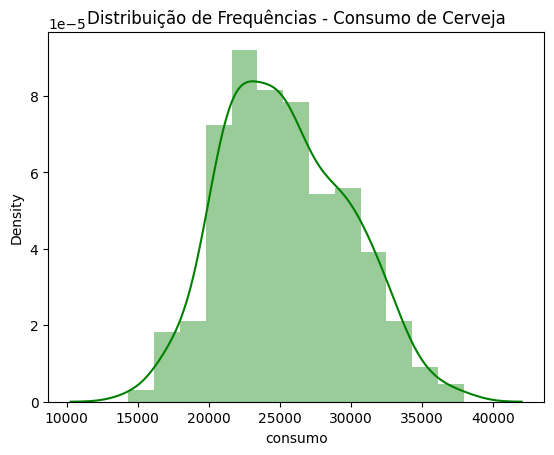

In [ ]:
# prompt: histograma da coluna 'consumo'

sns.distplot(dados['consumo'], color='green')
plt.title('Distribuição de Frequências - Consumo de Cerveja')
plt.show()


In [ ]:
# prompt: padronize a coluna 'consumo' de -10 a 10 com Standard Scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados['consumo'] = scaler.fit_transform(dados['consumo'].values.reshape(-1, 1))

# Verificando os dados
dados.head()


,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,0.013574
1,02/01/2015,27.02,24.5,33.5,0.0,0,0.812780
2,03/01/2015,24.82,22.4,29.9,0.0,1,1.232072
3,04/01/2015,23.98,21.5,28.6,1.2,1,1.001029
4,05/01/2015,23.82,21.0,28.3,0.0,0,0.796390


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='consumo', ylabel='Consumo de Cerveja (Litros)'>

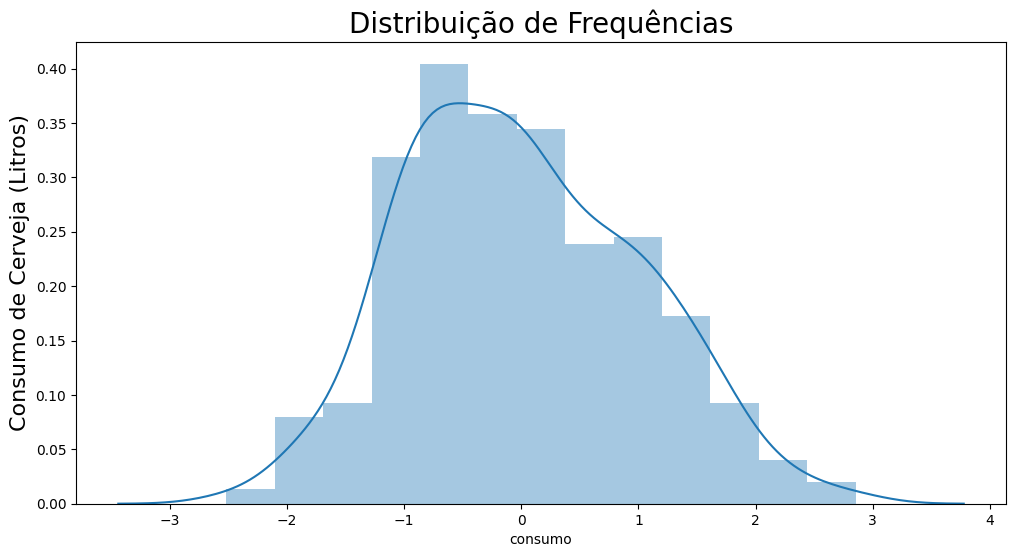

In [ ]:
# Gerando um histograma para a coluna "consumo"
ax = sns.distplot(dados['consumo'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

ax

# <font color='red' style='font-size: 30px;'>Variável Dependente X Variáveis Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [ ]:
# ax = sns.pairplot(dados)

## Plotando o pairplot fixando somente uma variável no eixo y

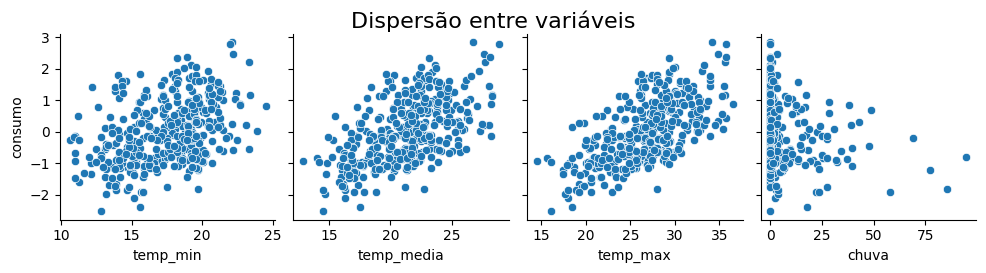

In [ ]:
# Eixo y: Variável Dependente
# Eixo X: Variáveis Independentes.
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.05)
ax

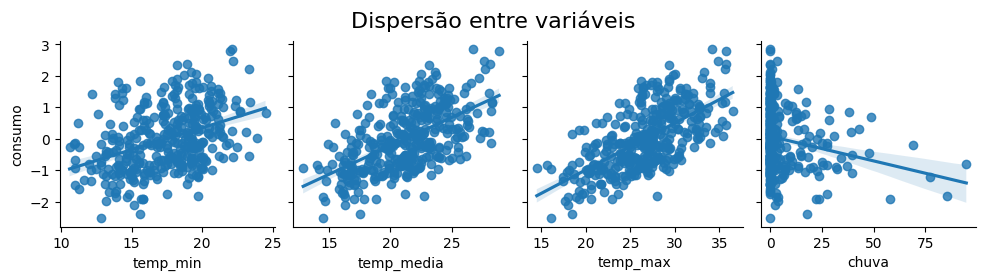

In [ ]:
# Estimando a reta de regressão com "reg".
ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media', 'temp_max', 'chuva'], kind='reg')
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.08)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o Consumo</font>
<hr style='border: 2px solid red;'>

# Regressão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [ ]:
# Variável dependente y
y = dados['consumo']
y

0      0.013574
1      0.812780
2      1.232072
3      1.001029
4      0.796390
         ...   
360    1.571923
361    0.157891
362   -0.703913
363   -1.123205
364   -0.672727
Name: consumo, Length: 365, dtype: float64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
X = dados[['temp_max', 'chuva', 'fds']]
X

,temp_max,chuva,fds
0,32.5,0.0,0
1,33.5,0.0,0
2,29.9,0.0,1
3,28.6,1.2,1
4,28.3,0.0,0
...,...,...,...
360,28.2,13.6,1
361,26.7,0.0,0
362,24.1,10.3,0
363,22.4,6.3,0


## Criando os datasets de treino e de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

,temp_max,chuva,fds
223,26.6,0.0,0
197,24.3,0.0,0
138,22.9,0.0,0
14,32.8,3.0,0
23,29.4,13.0,1
...,...,...,...
203,20.6,0.0,0
255,16.1,0.0,1
72,27.9,12.2,1
235,20.5,0.0,0


## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"



In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto

array([-0.24188569, -1.0530001 , -0.47579969, -1.70903715,  0.72693922,
       -0.91273561,  0.71111371, -0.57075276, -0.54528577,  0.19976696,
       -0.72451602, -0.01685984,  1.4645156 , -0.06433638, -1.30155973,
       -1.11228885, -0.2225915 ,  0.95369731, -1.18794773,  0.04644221,
        0.31155818, -0.30171906, -1.75578846,  1.53305721, -0.96639056,
       -1.5546611 , -0.72900788, -1.21959875, -0.4916252 ,  0.12672225,
        0.0306167 , -1.0138671 , -0.19094047, -0.30171906,  2.35074427,
        1.65117231, -0.63405481, -1.8904824 , -0.93358706, -0.01685984,
        1.15422805,  1.27401846, -0.14346394,  1.36956253,  0.0449749 ,
        0.33067178, -0.11181291, -1.7026451 ,  0.23634835, -0.14968662,
        0.49035555,  0.36593835,  0.64781166, -0.15928945,  0.90919403,
        0.37877796, -0.13386111,  1.00903319,  0.87897166, -0.11537717,
       -0.39063356, -0.52327622,  0.88519434, -0.74483339, -0.78518704,
       -0.0959874 ,  2.33491876, -0.08016189, -0.58657827, -0.31

In [ ]:
y_test

354   -0.129149
185   -0.934956
167   -0.342210
175   -1.351745
314    0.948674
         ...   
146   -0.260264
80     0.103260
88     0.102122
221   -0.505420
324    1.136013
Name: consumo, Length: 110, dtype: float64

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

R² = 0.71


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [ ]:
X_test[0:1]

,temp_max,chuva,fds
354,29.1,27.2,0


In [ ]:
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
354,29.1,27.2,0


## Gerando previsão pontual

In [ ]:
modelo.predict(entrada)[0].round(3)

-0.242

## Criando um simulador simples

In [ ]:
temp_max=5
chuva=30
fds=0
entrada=[[temp_max, chuva, fds]]

print(f'{modelo.predict(entrada)[0]:.2f} litros')

-4.10 litros


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Consumo de Cerveja) quando $X_2$ (Temperatura Máxima), $X_3$ (Chuva) e $X_4$ (Final de Semana) são iguais a zero.</p>

In [ ]:
modelo.intercept_

-4.448003203411082

In [ ]:
type(modelo.intercept_)

numpy.float64

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte: $\beta_2$ mede a variação no valor médio de $Y$ (Consumo de Cerveja), por unidade de variação em $X_2$ (Temperatura Máxima), mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes. Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_2$ sobre o valor médio de $Y$, excluídos os efeitos que $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

In [ ]:
modelo.coef_

array([ 0.15825512, -0.01467303,  1.1648652 ])

In [ ]:
type(modelo.coef_)

numpy.ndarray

## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Consumo de Cerveja seria de <b>5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C)</b> → Mantendo-se os valores de $X_3$ (Chuva) e $X_4$ (Final de Semana) constantes, o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de <b>684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Chuva (mm)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_4$ (Final de Semana) constantes, o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de <b>-60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Final de Semana (Sim/Não)</b> → Mantendo-se os valores de $X_2$ (Temperatura Máxima) e $X_3$ (Chuva) constantes, o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de <b>5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas das Previsões do Modelo</font>
<hr style='border: 2px solid red;'>

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão x Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

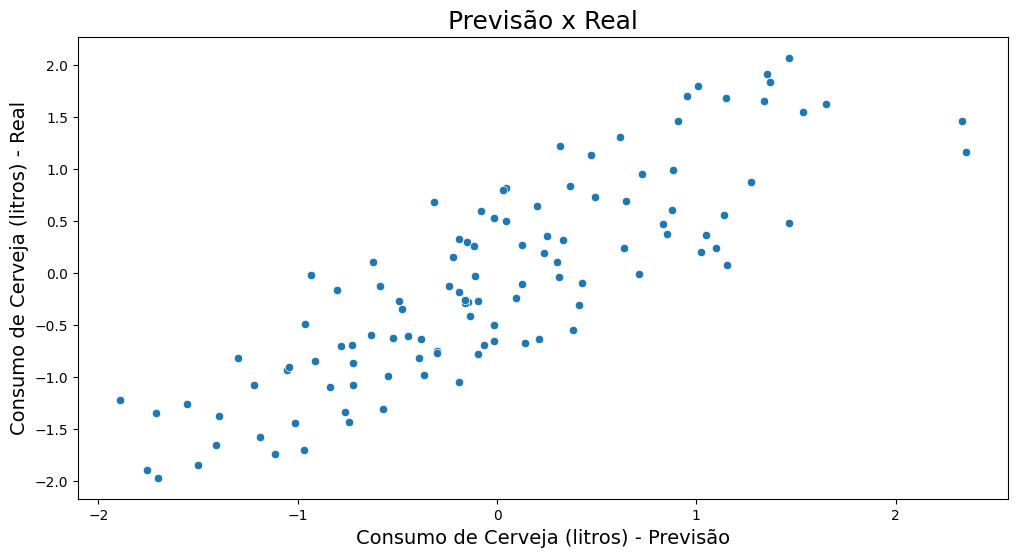

In [ ]:
ax = sns.scatterplot(x=y_previsto, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão x Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>
<hr style='border: 2px solid red;'>

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

## Criando os datasets de treino e de teste

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=2811)

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo_2 = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo_2" para estimar nosso modelo linear utilizando os dados de TREINO (y2_train e X2_train)

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [ ]:
print('Modelo com Temp. Média')
print(f'R² = {modelo_2.score(X2_train, y2_train).round(2)}')

Modelo com Temp. Média
R² = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

Modelo com Temp. Máxima
R² = 0.73


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [ ]:
print('Modelo com Temp. Média')
print(f'R² = {metrics.r2_score(y2_test, y_previsto_2).round(2)}')

Modelo com Temp. Média
R² = 0.66


In [ ]:
print('Modelo com Temp. Máxima')
print(f'R² = {metrics.r2_score(y_test, y_previsto).round(2)}')

Modelo com Temp. Máxima
R² = 0.71


# <font color='red' style='font-size: 30px;'>Outras Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE.

$$MSE(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{RMSE}$ mais baixo.

$$\sqrt{RMSE(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obtendo métricas para o modelo com Temperatura Média

In [ ]:
MSE_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
RMSE_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([MSE_2, RMSE_2, R2_2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,0.31
RMSE,0.56
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
MSE

0.27

In [ ]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
RMSE

0.52

In [ ]:
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,0.27
RMSE,0.52
R²,0.71
